In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import stats

In [84]:
#데이터로딩
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [85]:
# 결측치 확인
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
# Outcome 칼럼 제거
X = df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [88]:
y = df['Outcome']
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [89]:
# 데이터
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [90]:
#LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 0.16392743774224444


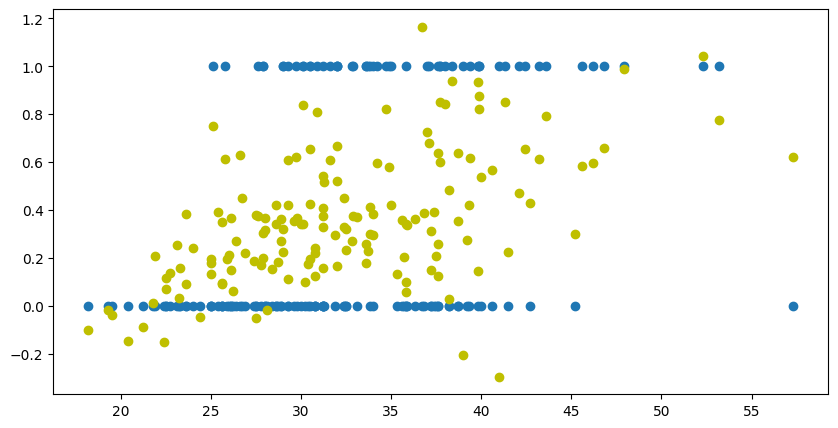

In [91]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['BMI'], y_test, label='y_test')
plt.scatter(X_test['BMI'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()

In [92]:
# DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 0.23376623376623376


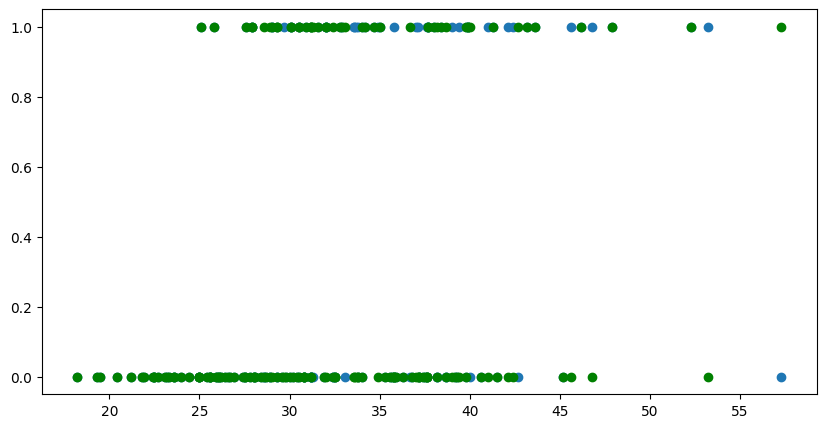

In [93]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['BMI'], y_test, label='y_test')
plt.scatter(X_test['BMI'], dy_preds, c='g', label='dy_preds')
plt.show()

In [94]:
#RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)



from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.1614538961038961


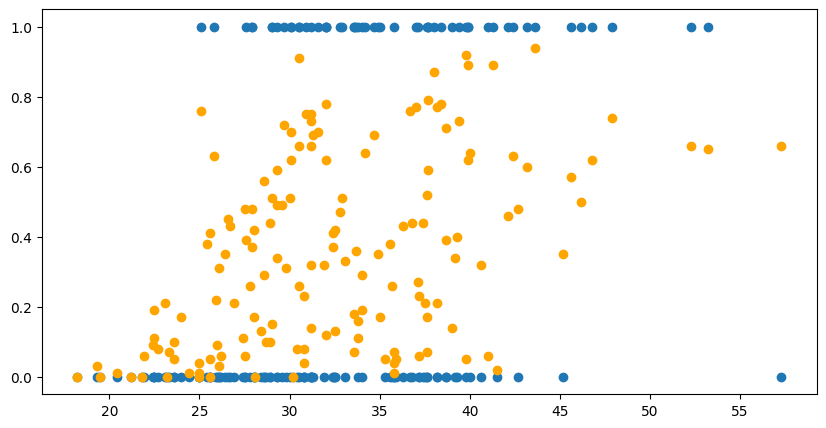

In [95]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['BMI'], y_test, label='y_test')
plt.scatter(X_test['BMI'], ry_preds, c='orange', label='ry_preds')

plt.show()

In [96]:
#SVR

from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)



from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.17692153394282156


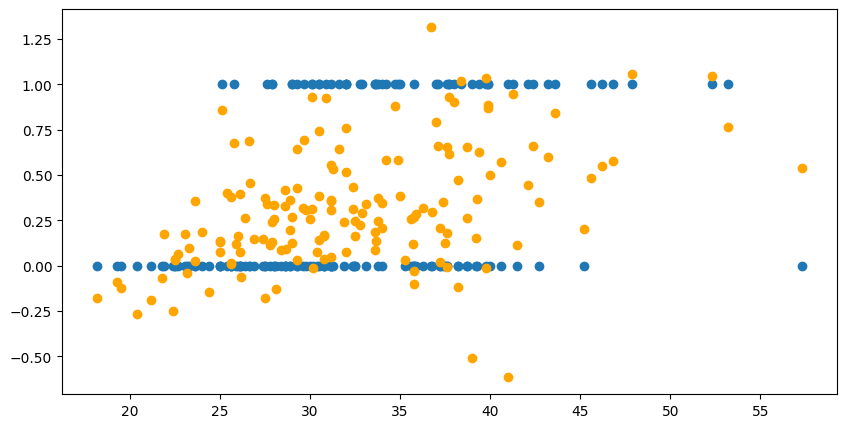

In [97]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['BMI'], y_test, label='y_test')
plt.scatter(X_test['BMI'], ry_preds, c='orange', label='ry_preds')

plt.show()